In [40]:
# take a list of 4 elements, and return a new list in the format:
# ['Afghanistan', 'p90p100', '2020', '0.5882']
def process_data(raw):

  # the details don't really matter
  # it's this way because WiD provides data in a weird format

  country = raw[0]
  country = country.split(";")
  country = country[0].strip()

  data = raw[3]
  data = data.split(";")

  data[0] = country
  return data

def read_data(file_path, debug=False):
  with open(file_path, "r", encoding="utf-8") as f:
      lines = [line.strip() for line in f if line.strip()]

  length = len(lines)
  if debug:
      print(f"Length={length}")

      # preview the first few lines
      for i, line in enumerate(lines[:10]):
        print(f"{i}: {line}")

  processed_data = []
  for i in range(0, int(length/4)):
    raw_lines = ["","","",""]
    for i in range(0, 4):
      raw_lines[i] = lines.pop(0)
    if raw_lines[3] != "":
      processed_data.append(process_data(raw_lines))

  return processed_data



In [41]:
import pandas as pd

# read the file into a list of parsed lines
file_path = "WID_wealth.csv"
data = read_data(file_path)

df_w = pd.DataFrame(data, columns=['Country', 'Division', 'Year', 'Wealth_Share'])
df_w['Year'] = df_w['Year'].astype(int)
df_w['Wealth_Share'] = df_w['Wealth_Share'].astype(float)

print(df_w)

     Country Division  Year  Wealth_Share
0    Austria  p90p100  2012        0.6067
1    Austria  p90p100  2013        0.6043
2    Austria  p90p100  2014        0.6009
3    Austria  p90p100  2015        0.6055
4    Austria  p90p100  2016        0.6054
..       ...      ...   ...           ...
967   Turkey  p99p100  2019        0.2922
968   Turkey  p99p100  2020        0.3060
969   Turkey  p99p100  2021        0.2945
970   Turkey  p99p100  2022        0.3200
971   Turkey  p99p100  2023        0.3523

[972 rows x 4 columns]


In [42]:
# read the file into a list of parsed lines
file_path = "WID_income.csv"
data = read_data(file_path)

df_i = pd.DataFrame(data, columns=['Country', 'Division', 'Year', 'Income_Share'])
df_i['Year'] = df_i['Year'].astype(int)
df_i['Income_Share'] = df_i['Income_Share'].astype(float)

print(df_i)

     Country Division  Year  Income_Share
0    Austria  p90p100  2012        0.3119
1    Austria  p90p100  2013        0.3140
2    Austria  p90p100  2014        0.3327
3    Austria  p90p100  2015        0.3260
4    Austria  p90p100  2016        0.3347
..       ...      ...   ...           ...
967   Turkey  p99p100  2019        0.1883
968   Turkey  p99p100  2020        0.2022
969   Turkey  p99p100  2021        0.1860
970   Turkey  p99p100  2022        0.2194
971   Turkey  p99p100  2023        0.2395

[972 rows x 4 columns]


In [43]:
# path to the csv file
file_path = "AI_adoption.csv"

# read the csv into a dataframe
df_ai = pd.read_csv(file_path)

print(df_ai)

        Country      2020     2021      2022   2023   2024
0       Denmark   9.30420  23.8861  19.52805  15.17  27.58
1        Sweden   6.95550   9.9228  10.14640  10.37  25.09
2       Belgium   5.46170  10.3210  12.06550  13.81  24.71
3       Finland   9.53960  15.7888  15.44440  15.10  24.37
4    Luxembourg   4.84310  13.0030  13.72650  14.45  23.73
5   Netherlands   4.34510  13.1044  13.23720  13.37  23.06
6      Slovenia   2.16800  11.7312  11.55060  11.37  20.89
7       Austria   3.82220   8.8306   9.81030  10.79  20.27
8       Germany   5.60030  10.5585  11.05425  11.55  19.75
9       Ireland  20.26620   7.8797   7.94485   8.01  14.90
10      Estonia   4.48780   2.7738   3.98190   5.19  13.89
11      Croatia   4.53110   8.7384   8.31420   7.89  11.76
12        Spain   7.42100   7.6652   8.42260   9.18  11.31
13      Czechia   5.50620   4.4599   5.17995   5.90  11.26
14     Slovakia   5.87460   5.1924   6.11620   7.04  10.78
15       France   4.80610   6.6654   6.27270   5.88   9.

In [44]:
# merge on Country, Division, and Year
df_inequality = pd.merge(df_i, df_w, on=["Country", "Division", "Year"])

# make sure datasets are compatible
df_inequality= df_inequality.replace("Czech Republic", "Czechia")

print(df_inequality)

     Country Division  Year  Income_Share  Wealth_Share
0    Austria  p90p100  2012        0.3119        0.6067
1    Austria  p90p100  2013        0.3140        0.6043
2    Austria  p90p100  2014        0.3327        0.6009
3    Austria  p90p100  2015        0.3260        0.6055
4    Austria  p90p100  2016        0.3347        0.6054
..       ...      ...   ...           ...           ...
967   Turkey  p99p100  2019        0.1883        0.2922
968   Turkey  p99p100  2020        0.2022        0.3060
969   Turkey  p99p100  2021        0.1860        0.2945
970   Turkey  p99p100  2022        0.2194        0.3200
971   Turkey  p99p100  2023        0.2395        0.3523

[972 rows x 5 columns]


In [45]:
# calculate p50p90 by calculating the remainder

# temporarily reformatting the dataframe makes this easier
df_wide_income = df_inequality.pivot_table(index=['Country', 'Year'], columns='Division', values='Income_Share').reset_index()
df_wide_wealth = df_inequality.pivot_table(index=['Country', 'Year'], columns='Division', values='Wealth_Share').reset_index()

# calculate
df_wide_income['Income_Share'] = 1 - df_wide_income['p0p50'] - df_wide_income['p90p100']
df_wide_income['Division'] = 'p50p90'
df_wide_wealth['Wealth_Share'] = 1 - df_wide_wealth['p0p50'] - df_wide_wealth['p90p100']
df_wide_wealth['Division'] = 'p50p90'

df_p50p90_income = df_wide_income[['Country', 'Year', 'Division', 'Income_Share']]
df_p50p90_wealth = df_wide_wealth[['Country', 'Year', 'Division', 'Wealth_Share']]

# merge everything back together
df_p50p90 = pd.merge(df_p50p90_income, df_p50p90_wealth, on=['Country', 'Year', 'Division'])
df_inequality = pd.concat([df_inequality, df_p50p90], ignore_index=True)

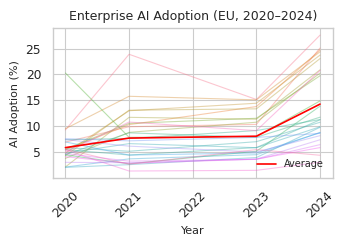

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# make a graph of ai adoption trends

# melt the dataframe to long format ready for seaborn
df_melted = df_ai.melt(id_vars='Country', var_name='Year', value_name='Enterprise AI Adoption (% of)')

# set to IEEE-style visual theme
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 8,
    'font.family': 'sans-serif',
})

# plots
plt.figure(figsize=(3.5, 2.5))  # the width of an IEEE column
sns.lineplot(
    data=df_melted,
    x='Year',
    y='Enterprise AI Adoption (% of)',
    hue='Country',
    linewidth=0.8,
    alpha=0.4,
    legend=False
)

# plot average line in red for clarity
avg_trend = df_melted.groupby('Year')['Enterprise AI Adoption (% of)'].mean().reset_index()
sns.lineplot(
    data=avg_trend,
    x='Year',
    y='Enterprise AI Adoption (% of)',
    color='red',
    linewidth=1.2,
    label='Average'
)

# axis and layout
plt.xlabel("Year", fontsize=8)
plt.ylabel("AI Adoption (%)", fontsize=8)
plt.xticks(rotation=45)
plt.title("Enterprise AI Adoption (EU, 2020–2024)", fontsize=9)
plt.legend(loc='lower right', fontsize=7, frameon=False)
plt.tight_layout()

# save as vector graphic for IEEE paper
plt.savefig("ai_adoption.pdf", bbox_inches='tight', dpi=300)

plt.show()


In [47]:
import pandas as pd

# split countries into high-ai and low-ai

# calculate the median ai adoption in 2023
median_2023 = df_ai['2023'].median()

# create the two dataframes
df_ai_high = df_ai[df_ai['2023'] > median_2023].copy()
df_ai_low = df_ai[df_ai['2023'] <= median_2023].copy()

# sort by 2023 value for easier visual confirmation
df_ai_high = df_ai_high.sort_values(by='2023', ascending=False)
df_ai_low = df_ai_low.sort_values(by='2023', ascending=False)

# print to check
print("Median AI Adoption (2023):", median_2023)
print("\nHigh AI Adoption Countries:\n", df_ai_high[['Country', '2023']])
print("\nLow AI Adoption Countries:\n", df_ai_low[['Country', '2023']])


Median AI Adoption (2023): 7.86

High AI Adoption Countries:
         Country   2023
0       Denmark  15.17
3       Finland  15.10
4    Luxembourg  14.45
2       Belgium  13.81
5   Netherlands  13.37
8       Germany  11.55
6      Slovenia  11.37
7       Austria  10.79
1        Sweden  10.37
12        Spain   9.18
25       Norway   9.17
9       Ireland   8.01
11      Croatia   7.89

Low AI Adoption Countries:
       Country  2023
19   Portugal  7.86
14   Slovakia  7.04
13    Czechia  5.90
15     France  5.88
26     Turkey  5.51
10    Estonia  5.19
20      Italy  5.05
18  Lithuania  4.86
17     Latvia  4.53
16     Greece  3.98
21    Hungary  3.68
23     Poland  3.67
22   Bulgaria  3.62
24    Romania  1.51




=== Division: p90p100 ===
Group means (control vs treatment × pre/post) for Income_Share:
time              0         1
treatment                    
0          0.364216  0.359770
1          0.324262  0.329542
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     17.78
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.07e-10
Time:                        09:14:40   Log-Likelihood:                 543.01
No. Observations:                 324   AIC:                            -1078.
Df Residuals:                     320   BIC:                            -1063.
Df Model:                           3                                         
Covariance Type:            nonrobust                                        

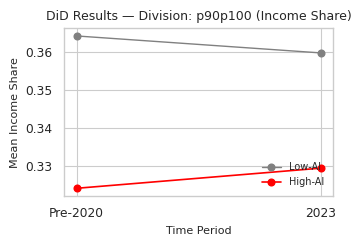



=== Division: p0p50 ===
Group means (control vs treatment × pre/post) for Income_Share:
time              0         1
treatment                    
0          0.197672  0.200948
1          0.223195  0.224037
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     21.53
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           9.95e-13
Time:                        09:14:41   Log-Likelihood:                 703.41
No. Observations:                 324   AIC:                            -1399.
Df Residuals:                     320   BIC:                            -1384.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         


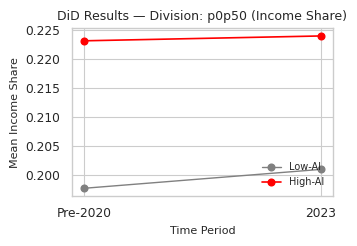



=== Division: p99p100 ===
Group means (control vs treatment × pre/post) for Income_Share:
time              0         1
treatment                    
0          0.123748  0.122836
1          0.101608  0.105775
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     15.21
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           2.83e-09
Time:                        09:14:41   Log-Likelihood:                 706.82
No. Observations:                 324   AIC:                            -1406.
Df Residuals:                     320   BIC:                            -1391.
Df Model:                           3                                         
Covariance Type:            nonrobust                                        

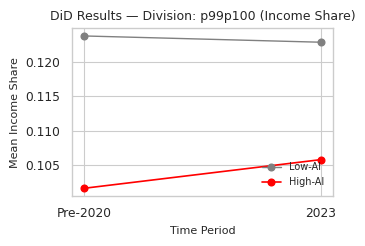



=== Division: p50p90 ===
Group means (control vs treatment × pre/post) for Income_Share:
time              0         1
treatment                    
0          0.438112  0.439282
1          0.452543  0.446421
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     5.129
Date:                Fri, 25 Apr 2025   Prob (F-statistic):            0.00177
Time:                        09:14:41   Log-Likelihood:                 688.65
No. Observations:                 324   AIC:                            -1369.
Df Residuals:                     320   BIC:                            -1354.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         

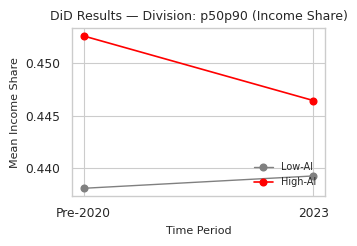

In [49]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# run model on Income_Share

# define high-ai vs low-ai groups based on 2023 median
median_ai2023 = df_ai['2023'].median()
high_countries = df_ai[df_ai['2023'] > median_ai2023]['Country']

# set intervention window
start_year, end_year = 2020, 2023

# set to IEEE-style visual theme
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 8,
    'font.family': 'sans-serif',
})

# loop each Division and run DiD on Income_Share
for division in df_inequality['Division'].unique():
    print(f"\n\n=== Division: {division} ===")
    # subset for this division
    data = df_inequality[df_inequality['Division'] == division].copy()

    # treatment indicator: high‐ai countries
    data['treatment'] = data['Country'].isin(high_countries).astype(int)
    # time indicator: 1 if Year in [2020,2023], else 0
    data['time'] = ((data['Year'] >= start_year) & (data['Year'] <= end_year)).astype(int)
    # outcome to test
    data['outcome'] = data['Income_Share']

    # print group means for treatment/control × pre/post
    means = data.groupby(['treatment','time'])['outcome'].mean().unstack()
    print(f"Group means (control vs treatment × pre/post) for Income_Share:")
    print(means)

    # create interaction term and run OLS model
    data['treatment_time'] = data['treatment'] * data['time']
    X = sm.add_constant(data[['treatment','time','treatment_time']])
    y = data['outcome']
    model = sm.OLS(y, X).fit()
    print(model.summary())
    print(f"Estimated DiD effect for Income_Share: {model.params['treatment_time']:.4f}")

    plt.figure(figsize=(3.5, 2.5))

    # plot control (low-ai) and treatment (high-ai) groups
    plt.plot([0, 1], means.loc[0], 'o-', color='gray', label='Low-AI', linewidth=1)
    plt.plot([0, 1], means.loc[1], 'o-', color='red', label='High-AI', linewidth=1.2)

    # labels and title
    plt.xticks([0, 1], ['Pre-2020', f'{end_year}'])
    plt.xlabel('Time Period', fontsize=8)
    plt.ylabel('Mean Income Share', fontsize=8)
    plt.title(f'DiD Results — Division: {division} (Income Share)', fontsize=9)

    # legend
    plt.legend(fontsize=7, loc='lower right', frameon=False)

    plt.tight_layout()

    # save as vector graphic for IEEE paper
    plt.savefig(f"did_income_{division}.pdf", bbox_inches='tight', dpi=300)

    plt.show()




=== Division: p90p100 ===
Group means (control vs treatment × pre/post) for Wealth_Share:
time              0         1
treatment                    
0          0.596208  0.601721
1          0.573185  0.571146
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     6.192
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           0.000423
Time:                        09:14:52   Log-Likelihood:                 488.32
No. Observations:                 324   AIC:                            -968.6
Df Residuals:                     320   BIC:                            -953.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                        

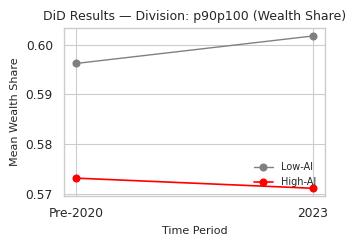



=== Division: p0p50 ===
Group means (control vs treatment × pre/post) for Wealth_Share:
time              0         1
treatment                    
0          0.033464  0.032980
1          0.029821  0.030894
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1806
Date:                Fri, 25 Apr 2025   Prob (F-statistic):              0.910
Time:                        09:14:52   Log-Likelihood:                 590.64
No. Observations:                 324   AIC:                            -1173.
Df Residuals:                     320   BIC:                            -1158.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         


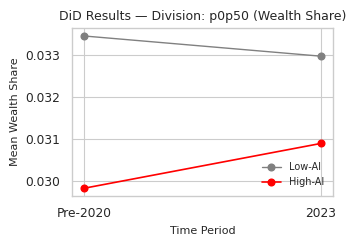



=== Division: p99p100 ===
Group means (control vs treatment × pre/post) for Wealth_Share:
time              0         1
treatment                    
0          0.254417  0.264100
1          0.232391  0.229652
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     10.41
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.48e-06
Time:                        09:14:52   Log-Likelihood:                 557.91
No. Observations:                 324   AIC:                            -1108.
Df Residuals:                     320   BIC:                            -1093.
Df Model:                           3                                         
Covariance Type:            nonrobust                                        

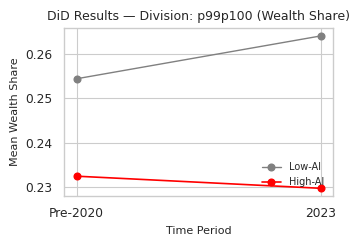



=== Division: p50p90 ===
Group means (control vs treatment × pre/post) for Wealth_Share:
time              0         1
treatment                    
0          0.370328  0.365298
1          0.396994  0.397960
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     15.56
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.79e-09
Time:                        09:14:53   Log-Likelihood:                 601.76
No. Observations:                 324   AIC:                            -1196.
Df Residuals:                     320   BIC:                            -1180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         

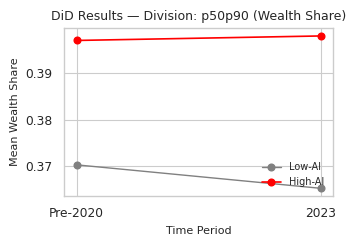

In [50]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# run model on Wealth_Share

# define high-ai vs low-ai groups based on 2023 median
median_ai2023 = df_ai['2023'].median()
high_countries = df_ai[df_ai['2023'] > median_ai2023]['Country']

# set intervention window
start_year, end_year = 2020, 2023

# set to IEEE-style visual theme
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 8,
    'font.family': 'sans-serif',
})

# loop each Division and run DiD on Wealth_Share
for division in df_inequality['Division'].unique():
    print(f"\n\n=== Division: {division} ===")
    # subset for this division
    data = df_inequality[df_inequality['Division'] == division].copy()

    # treatment indicator: high‐ai countries
    data['treatment'] = data['Country'].isin(high_countries).astype(int)
    # time indicator: 1 if Year in [2020,2023], else 0
    data['time'] = ((data['Year'] >= start_year) & (data['Year'] <= end_year)).astype(int)
    # outcome to test
    data['outcome'] = data['Wealth_Share']

    # print group means for treatment/control × pre/post
    means = data.groupby(['treatment','time'])['outcome'].mean().unstack()
    print(f"Group means (control vs treatment × pre/post) for Wealth_Share:")
    print(means)

    # create interaction term and run OLS model
    data['treatment_time'] = data['treatment'] * data['time']
    X = sm.add_constant(data[['treatment','time','treatment_time']])
    y = data['outcome']
    model = sm.OLS(y, X).fit()
    print(model.summary())
    print(f"Estimated DiD effect for Wealth_Share: {model.params['treatment_time']:.4f}")

    plt.figure(figsize=(3.5, 2.5))

    # plot control (low-ai) and treatment (high-ai) groups
    plt.plot([0, 1], means.loc[0], 'o-', color='gray', label='Low-AI', linewidth=1)
    plt.plot([0, 1], means.loc[1], 'o-', color='red', label='High-AI', linewidth=1.2)

    # labels and title
    plt.xticks([0, 1], ['Pre-2020', f'{end_year}'])
    plt.xlabel('Time Period', fontsize=8)
    plt.ylabel('Mean Wealth Share', fontsize=8)
    plt.title(f'DiD Results — Division: {division} (Wealth Share)', fontsize=9)

    # legend
    plt.legend(fontsize=7, loc='lower right', frameon=False)

    plt.tight_layout()

    # save as vector graphic for IEEE paper
    plt.savefig(f"did_wealth_{division}.pdf", bbox_inches='tight', dpi=300)

    plt.show()




=== Division: p90p100 (Parallel Trends Test) ===
Group means (control vs treatment × fake pre/post):
time              0         1
treatment                    
0          0.365340  0.362343
1          0.323543  0.325459
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     14.84
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           8.36e-09
Time:                        09:08:27   Log-Likelihood:                 369.92
No. Observations:                 216   AIC:                            -731.8
Df Residuals:                     212   BIC:                            -718.3
Df Model:                           3                                         
Covariance Type:            nonrobust                             

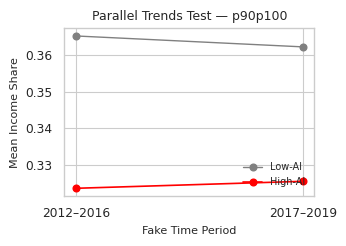



=== Division: p0p50 (Parallel Trends Test) ===
Group means (control vs treatment × fake pre/post):
time              0         1
treatment                    
0          0.196916  0.198933
1          0.222026  0.225144
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     15.20
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           5.40e-09
Time:                        09:08:28   Log-Likelihood:                 468.68
No. Observations:                 216   AIC:                            -929.4
Df Residuals:                     212   BIC:                            -915.8
Df Model:                           3                                         
Covariance Type:            nonrobust                               

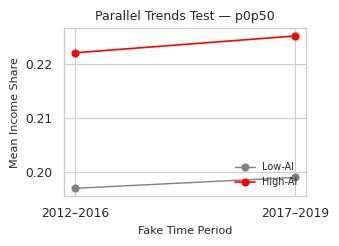



=== Division: p99p100 (Parallel Trends Test) ===
Group means (control vs treatment × fake pre/post):
time              0         1
treatment                    
0          0.123791  0.123676
1          0.101197  0.102292
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     12.68
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.18e-07
Time:                        09:08:28   Log-Likelihood:                 480.75
No. Observations:                 216   AIC:                            -953.5
Df Residuals:                     212   BIC:                            -940.0
Df Model:                           3                                         
Covariance Type:            nonrobust                             

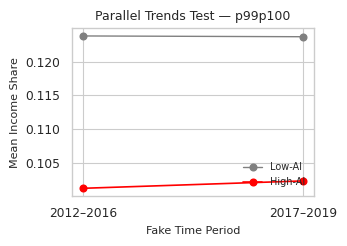



=== Division: p50p90 (Parallel Trends Test) ===
Group means (control vs treatment × fake pre/post):
time              0         1
treatment                    
0          0.437744  0.438724
1          0.454431  0.449397
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     9.925
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           2.44e-06
Time:                        09:08:28   Log-Likelihood:                 929.96
No. Observations:                 432   AIC:                            -1852.
Df Residuals:                     428   BIC:                            -1836.
Df Model:                           3                                         
Covariance Type:            nonrobust                              

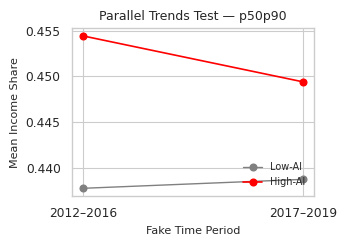

In [38]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# define high ai vs low ai groups based on 2023 median
median_ai2023 = df_ai['2023'].median()
high_countries = df_ai[df_ai['2023'] > median_ai2023]['Country']

# set fake adoption window for testing parallel trends
start_year, end_year = 2012, 2019
fake_treatment_year = 2016

# set to IEEE-style visual theme
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 8,
    'font.family': 'sans-serif',
})

# loop each Division and run DiD on Income_Share (only pre 2020 data)
for division in df_inequality['Division'].unique():
    print(f"\n\n=== Division: {division} (Parallel Trends Test) ===")

    # restrict to 2012–2019
    data = df_inequality[
        (df_inequality['Division'] == division) &
        (df_inequality['Year'] >= start_year) &
        (df_inequality['Year'] <= end_year)
    ].copy()

    # treatment indicator: high‐ai countries
    data['treatment'] = data['Country'].isin(high_countries).astype(int)
    # time indicator: 1 if after fake treatment year [2016], else 0
    data['time'] = (data['Year'] > fake_treatment_year).astype(int)
    # outcome to test
    data['outcome'] = data['Income_Share']

    # print group means for treatment/control × pre/post
    means = data.groupby(['treatment', 'time'])['outcome'].mean().unstack()
    print("Group means (control vs treatment × fake pre/post):")
    print(means)

    # create interaction term and run OLS model
    data['treatment_time'] = data['treatment'] * data['time']
    X = sm.add_constant(data[['treatment', 'time', 'treatment_time']])
    y = data['outcome']
    model = sm.OLS(y, X).fit()
    print(model.summary())
    print(f"Estimated DiD effect (fake): {model.params['treatment_time']:.4f}")

    plt.figure(figsize=(3.5, 2.5))

    # plot control (low-ai) and treatment (high-ai) groups
    plt.plot([0, 1], means.loc[0], 'o-', color='gray', label='Low-AI', linewidth=1)
    plt.plot([0, 1], means.loc[1], 'o-', color='red', label='High-AI', linewidth=1.2)

    # labels and title
    plt.xticks([0, 1], [f'{start_year}–{fake_treatment_year}', f'{fake_treatment_year+1}–{end_year}'])
    plt.xlabel('Fake Time Period', fontsize=8)
    plt.ylabel('Mean Income Share', fontsize=8)
    plt.title(f'Parallel Trends Test — {division}', fontsize=9)

    # legend
    plt.legend(fontsize=7, loc='lower right', frameon=False)

    plt.tight_layout()

    plt.show()




=== Division: p90p100 (Parallel Trends Test) ===
Group means (control vs treatment × fake pre/post):
time              0         1
treatment                    
0          0.594057  0.599793
1          0.574489  0.571010
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     3.286
Date:                Fri, 25 Apr 2025   Prob (F-statistic):             0.0217
Time:                        09:09:29   Log-Likelihood:                 322.31
No. Observations:                 216   AIC:                            -636.6
Df Residuals:                     212   BIC:                            -623.1
Df Model:                           3                                         
Covariance Type:            nonrobust                             

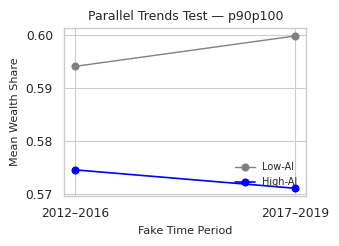



=== Division: p0p50 (Parallel Trends Test) ===
Group means (control vs treatment × fake pre/post):
time              0         1
treatment                    
0          0.032624  0.034864
1          0.028982  0.031221
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.2059
Date:                Fri, 25 Apr 2025   Prob (F-statistic):              0.892
Time:                        09:09:29   Log-Likelihood:                 392.86
No. Observations:                 216   AIC:                            -777.7
Df Residuals:                     212   BIC:                            -764.2
Df Model:                           3                                         
Covariance Type:            nonrobust                               

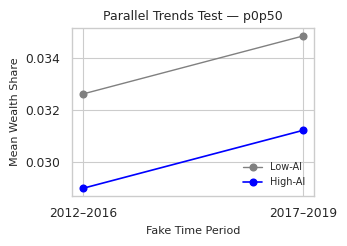



=== Division: p99p100 (Parallel Trends Test) ===
Group means (control vs treatment × fake pre/post):
time              0         1
treatment                    
0          0.249387  0.262800
1          0.233082  0.231241
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     5.910
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           0.000684
Time:                        09:09:29   Log-Likelihood:                 381.35
No. Observations:                 216   AIC:                            -754.7
Df Residuals:                     212   BIC:                            -741.2
Df Model:                           3                                         
Covariance Type:            nonrobust                             

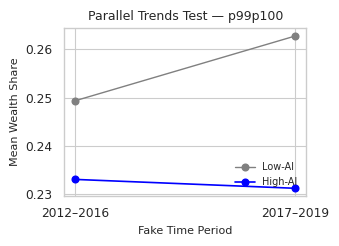



=== Division: p50p90 (Parallel Trends Test) ===
Group means (control vs treatment × fake pre/post):
time              0         1
treatment                    
0          0.373319  0.365343
1          0.396529  0.397769
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     18.30
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           3.45e-11
Time:                        09:09:29   Log-Likelihood:                 799.48
No. Observations:                 432   AIC:                            -1591.
Df Residuals:                     428   BIC:                            -1575.
Df Model:                           3                                         
Covariance Type:            nonrobust                              

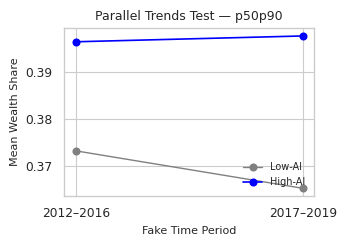

In [39]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# define high-ai vs low-ai groups based on 2023 median
median_ai2023 = df_ai['2023'].median()
high_countries = df_ai[df_ai['2023'] > median_ai2023]['Country']

# set fake adoption window for testing parallel trends
start_year, end_year = 2012, 2019
fake_treatment_year = 2016

# set to IEEE-style visual theme
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 8,
    'font.family': 'sans-serif',
})

# loop each Division and run DiD on Wealth_Share (only pre 2020 data)
for division in df_inequality['Division'].unique():
    print(f"\n\n=== Division: {division} (Parallel Trends Test) ===")

    # restrict to 2012–2019
    data = df_inequality[
        (df_inequality['Division'] == division) &
        (df_inequality['Year'] >= start_year) &
        (df_inequality['Year'] <= end_year)
    ].copy()

    # treatment indicator: high‐ai countries
    data['treatment'] = data['Country'].isin(high_countries).astype(int)
    # time indicator: 1 if after fake treatment year [2016], else 0
    data['time'] = (data['Year'] > fake_treatment_year).astype(int)
    # outcome to test
    data['outcome'] = data['Wealth_Share']

    # print group means for treatment/control × pre/post
    means = data.groupby(['treatment', 'time'])['outcome'].mean().unstack()
    print("Group means (control vs treatment × fake pre/post):")
    print(means)

    # create interaction term and run OLS model
    data['treatment_time'] = data['treatment'] * data['time']
    X = sm.add_constant(data[['treatment', 'time', 'treatment_time']])
    y = data['outcome']
    model = sm.OLS(y, X).fit()
    print(model.summary())
    print(f"Estimated DiD effect (fake): {model.params['treatment_time']:.4f}")

    plt.figure(figsize=(3.5, 2.5))

    # plot control (low-ai) and treatment (high-ai) groups
    plt.plot([0, 1], means.loc[0], 'o-', color='gray', label='Low-AI', linewidth=1)
    plt.plot([0, 1], means.loc[1], 'o-', color='blue', label='High-AI', linewidth=1.2)

    # labels and title
    plt.xticks([0, 1], [f'{start_year}–{fake_treatment_year}', f'{fake_treatment_year+1}–{end_year}'])
    plt.xlabel('Fake Time Period', fontsize=8)
    plt.ylabel('Mean Wealth Share', fontsize=8)
    plt.title(f'Parallel Trends Test — {division}', fontsize=9)

    # legend
    plt.legend(fontsize=7, loc='lower right', frameon=False)

    plt.tight_layout()

    plt.show()
